In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def equation(x):
    f = 2*x+3*np.tan(x/4)-np.exp(x)
    return f         

In [127]:
def lin(a,b,N):
    #we already know there is a root for f and so we don't need to check again
    #this time we define the number of iterations 
    n=0
    while n<N:
        n = n+1
        f1 = equation(a)
        f2= equation(b)
        c = b - (f2/(f2-f1))*(b-a)
        f3 = equation(c)
        s1 = f1*f3
        s2 = f2*f3
        if s1<0:
            b = c
        if s2<0:
            a = c
    print("The root is:", c)
    return c

    #we can (instead of the print command) use a return command, giving us the option to manage the results and/or use them in later calculations  
    
def lin2(a,b,er):
    n=0
    i = 0 
    while i==0:
        n = n+1
        f1 = equation(a)
        f2= equation(b)
        c = b - (f2/(f2-f1))*(b-a)
             
        f3 = equation(c)
        s1 = f1*f3
        s2 = f2*f3

        if s1<0:
            b = c
            error = abs((b - (f2/(f2-f1))*(b-a))-c)
            if error < er:
                break
        if s2<0:
            a = c
            error = abs((b - (f2/(f2-f1))*(b-a))-c)
            if error < er:
                break
        
    print("The root is:", c)
    print("The number of iterations is:", n)
    return c


In [128]:
a = 0.5
b=1
print("For 8 iterations:")
lin(a,b,8)
print("For 18 iterations:")
lin(a,b,18)
print("For 38 iterations")
lin(a,b,38)

For 8 iterations:
The root is: 0.8337843858737103
For 18 iterations:
The root is: 0.8335556088442155
For 38 iterations
The root is: 0.8335555793434618


0.8335555793434618

In [129]:
root = lin(a,b,38)

The root is: 0.8335555793434618


In [141]:
def der(x):
    d = 2 + 3*(1/(4*((np.cos(x/4))**2)))- np.exp(x)
    return d
def der2(x):
    d = -np.exp(x)+(3/8)*np.tan(x/4)/(np.cos(x/4)**2)
    return d


k is: -2.3012656883682894


In [152]:
def plotting(a,b,N):
    n=0
    er=[]
    ns = []
    pre = []
    while n<N:
        n = n+1
        ns.append(n)
        f1 = equation(a)
        f2= equation(b)
        c = b - (f2/(f2-f1))*(b-a)
        f3 = equation(c)
        er.append(abs(root- c))
        
        s1 = f1*f3
        s2 = f2*f3
        if s1<0:
            b = c
        if s2<0:
            a = c
    k = der2(root)/(2*der(root))
    print("k is:",k)


    for i in range (0,n-1):
        pre.append(k*(er[i]**1.618))
    pre.append(0)
    #We assume that the next solution will be the root and therefore the error will be zero. 
    #We need a specific length for the table otherwise the programm won't run
    
    graph = plt.plot(ns,er,pre, marker='o')
    print("this is how the error converges")
    plt.show(graph)
    print(er)
    print("\n And in a logarithmic scale: ")
    fig, ax = plt.subplots()
    ax.plot(ns, er,ns,pre, marker = 'o')
    ax.set_yscale('log')
    ax.set(xlabel='iteration', ylabel='error')
    ax.grid()
    plt.xlim(right=N)
    tick_spacing = 1
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing)) 
    plt.show()
    
    

so for 38 iterations
k is: -2.3012656883682894
this is how the error converges


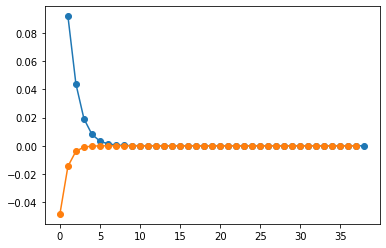

[0.09172772948008268, 0.043702292675473875, 0.019150173116576186, 0.008060407210241927, 0.0033332248425950173, 0.0013681695964822271, 0.0005598588147684991, 0.00022880653024848208, 9.346172320268131e-05, 3.816870208517287e-05, 1.558631748277417e-05, 6.364500679367779e-06, 2.5988361861406517e-06, 1.061184556117034e-06, 4.333131751188546e-07, 1.769344670776718e-07, 7.224749831724608e-08, 2.9500753728761708e-08, 1.2046014519206949e-08, 4.918736973280602e-09, 2.008463284575157e-09, 8.201135326402209e-10, 3.3487601580617365e-10, 1.367397306495377e-10, 5.583478124293606e-11, 2.2798651855282515e-11, 9.308998016877013e-12, 3.800404435594373e-12, 1.5514256546111937e-12, 6.334932578511143e-13, 2.5845992013273644e-13, 1.0524914273446484e-13, 4.2521541843143495e-14, 1.687538997430238e-14, 6.5503158452884236e-15, 2.220446049250313e-15, 5.551115123125783e-16, 0.0]

 And in a logarithmic scale: 


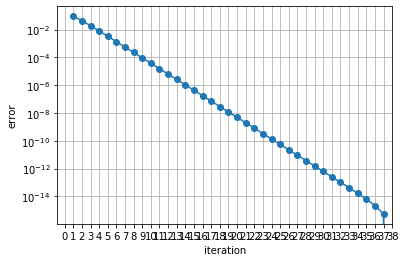

In [153]:
print("so for 38 iterations")
plotting(a,b,38)

Let's check for the fewer 8 iterations:
k is: -2.3012656883682894
this is how the error converges


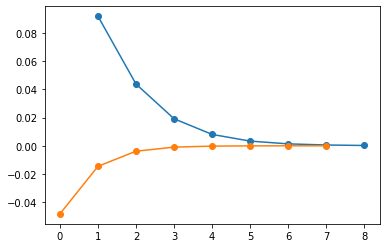

[0.09172772948008268, 0.043702292675473875, 0.019150173116576186, 0.008060407210241927, 0.0033332248425950173, 0.0013681695964822271, 0.0005598588147684991, 0.00022880653024848208]

 And in a logarithmic scale: 


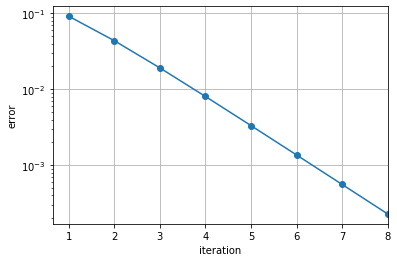

In [154]:
print("Let's check for the fewer 8 iterations:")
plotting(a,b,8)

In [155]:
print("Let's check with the errors\n \n For error smaller than 10^(-3)")
lin2(a,b,10**(-3))
print("\n Smaller than 10^-6")
lin2(a,b,10**(-6))
print("\n and smaller than 10^(-12)")
lin(a,b,10**(-12))

Let's check with the errors
 
 For error smaller than 10^(-3)
The root is: 0.8341154381582303
The number of iterations is: 7

 Smaller than 10^-6
The root is: 0.8335560126566369
The number of iterations is: 15

 and smaller than 10^(-12)
The root is: 0.9252833088235445


0.9252833088235445